In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler



DATA ANALYSIS

In [99]:
data = pd.read_csv('winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [100]:
data.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [101]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [102]:
classes = data['quality'].value_counts()
classes

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

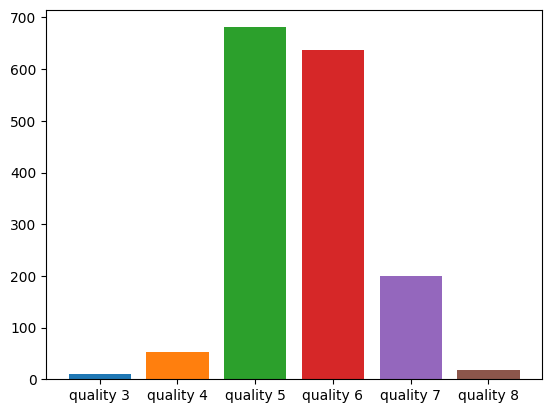

In [103]:
plt.bar('quality 3' , classes[3])
plt.bar('quality 4' , classes[4])   
plt.bar('quality 5' , classes[5]) 
plt.bar('quality 6' , classes[6])   
plt.bar('quality 7' , classes[7])   
plt.bar('quality 8' , classes[8])        
plt.show()

In [104]:
def classy(old_class):
  
  if old_class <= 5:
    return 0
  else:
    return 1

data['quality'] = data['quality'].apply(classy)

In [105]:
classes = data['quality'].value_counts()
classes

quality
1    855
0    744
Name: count, dtype: int64

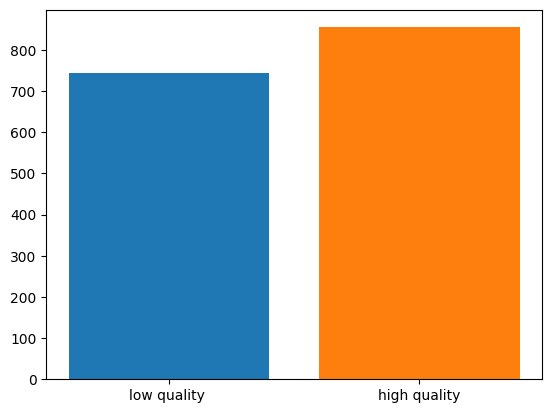

In [106]:
plt.bar('low quality ' , classes[0])
plt.bar('high quality' , classes[1]) 
plt.show()

In [107]:
data.duplicated().sum()

240

In [108]:
len (data)

1599

In [109]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [110]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [111]:
len(data)

1359

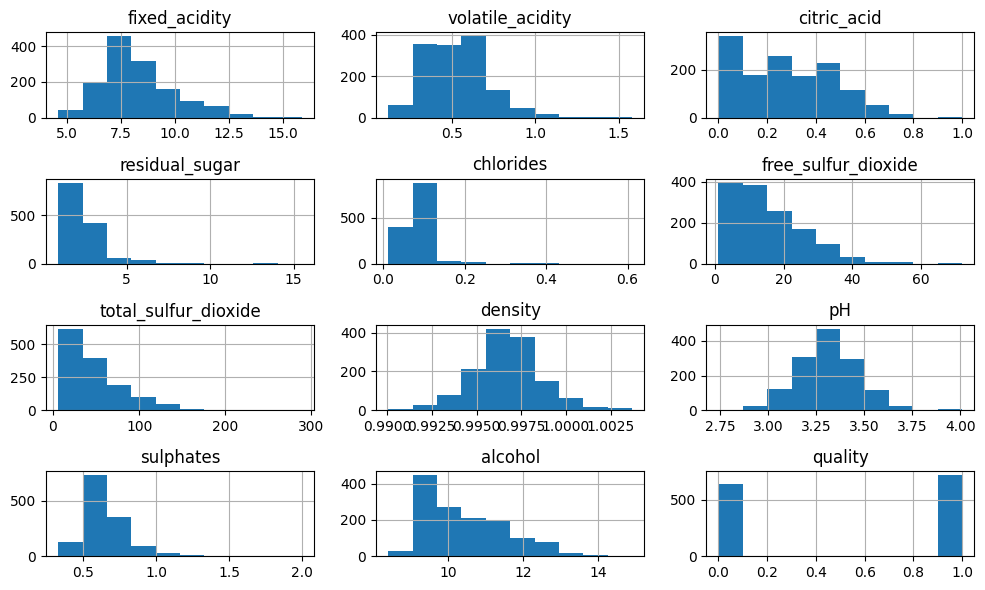

In [112]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

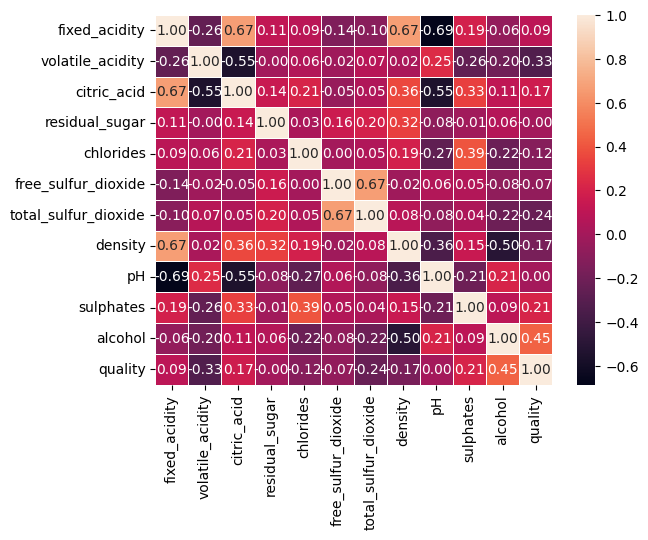

In [113]:
corr_matrix = data.corr()
ax= sn.heatmap(corr_matrix, annot=True, linewidths=.5 , fmt= ".2f")
ax.set(xlabel='',ylabel='')
plt.show()

In [114]:
y = data["quality"]
X = data.drop("quality", axis = 1)


In [115]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)


In [116]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
cnt3 = 0
cnt2 = 0
cnt1 = 0

In [117]:
knn_search_space ={ 
    'n_neighbors': np.arange(2, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]}

knn = KNeighborsClassifier()

In [118]:
knn_acc =[]
knn_recall = []
knn_precision = []
knn_f1_score = []

In [119]:
for train_index, test_index in kfold.split(X, y):
  cnt1 += 1
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  random_search = RandomizedSearchCV(estimator=knn, param_distributions=knn_search_space, n_iter=100)
  random_search.fit(x_train, y_train)
  best_params = random_search.best_params_
  knn = KNeighborsClassifier(**best_params)
  knn.fit(x_train, y_train)

  knn_pred = knn.predict(x_test)
  knn_report = classification_report(y_test, knn_pred)

  knn_acc.append(accuracy_score(y_test, knn_pred))
  knn_precision.append(precision_score(y_test, knn_pred))
  knn_recall.append(recall_score(y_test, knn_pred))
  knn_f1_score.append(f1_score(y_test, knn_pred))

  print('********** Fold number -{:n}- **********'.format(cnt1))
  print(knn_report)

********** Fold number -1- **********
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       164
           1       0.75      0.77      0.76       176

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.74      0.74      0.74       340

********** Fold number -2- **********
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       154
           1       0.79      0.73      0.76       186

    accuracy                           0.74       340
   macro avg       0.74      0.75      0.74       340
weighted avg       0.75      0.74      0.74       340

********** Fold number -3- **********
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       169
           1       0.71      0.77      0.74       171

    accuracy                           0.72       340
   macro avg  

In [120]:
svm_search_space = {
    'C': [0.1, 1,10,100,1000],
 'gamma': [1,0.1,0.01,0.001,0.0001],
 'kernel': ['rbf', 'linear', 'poly']}

svm = SVC()

In [121]:
svm_acc =[]
svm_recall = []
svm_precision = []
svm_f1_score = []

In [122]:
for train_index, test_index in kfold.split(X, y):
  cnt2 += 1
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  random_search = RandomizedSearchCV(estimator=svm, param_distributions=svm_search_space, n_iter=100)
  random_search.fit(x_train, y_train)
  best_params = random_search.best_params_
  svm = SVC(**best_params)
  svm.fit(x_train, y_train)

  svm_pred = svm.predict(x_test)
  svm_report = classification_report(y_test, svm_pred)

  svm_acc.append(accuracy_score(y_test, svm_pred))
  svm_precision.append(precision_score(y_test, svm_pred))
  svm_recall.append(recall_score(y_test, svm_pred))
  svm_f1_score.append(f1_score(y_test, svm_pred))

  print('********** Fold number -{:n}- **********'.format(cnt2))
  print(svm_report)
  

c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


********** Fold number -1- **********
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       164
           1       0.77      0.77      0.77       176

    accuracy                           0.76       340
   macro avg       0.76      0.76      0.76       340
weighted avg       0.76      0.76      0.76       340



c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


********** Fold number -2- **********
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       154
           1       0.81      0.72      0.76       186

    accuracy                           0.76       340
   macro avg       0.76      0.76      0.76       340
weighted avg       0.76      0.76      0.76       340



c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


********** Fold number -3- **********
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       169
           1       0.74      0.70      0.72       171

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340



c:\Users\yilma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


********** Fold number -4- **********
              precision    recall  f1-score   support

           0       0.67      0.78      0.73       153
           1       0.80      0.69      0.74       186

    accuracy                           0.73       339
   macro avg       0.73      0.74      0.73       339
weighted avg       0.74      0.73      0.73       339



In [123]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_forest = RandomForestClassifier()

In [124]:
random_forest_acc =[]
random_forest_recall = []
random_forest_precision = []
random_forest_f1_score = []

In [125]:
for train_index, test_index in kfold.split(X, y):
  cnt3 += 1
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=rfc_search_space, n_iter=100)
  random_search.fit(x_train, y_train)
  best_params = random_search.best_params_
  random_forest = RandomForestClassifier(**best_params)
  random_forest.fit(x_train, y_train)

  random_forest_pred = random_forest.predict(x_test)
  random_forest_report = classification_report(y_test, random_forest_pred)

  random_forest_acc.append(accuracy_score(y_test, random_forest_pred))
  random_forest_precision.append(precision_score(y_test, random_forest_pred))
  random_forest_recall.append(recall_score(y_test, random_forest_pred))
  random_forest_f1_score.append(f1_score(y_test, random_forest_pred))

  print('********** Fold number -{:n}- **********'.format(cnt3))
  print(random_forest_report)
  

********** Fold number -1- **********
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       164
           1       0.74      0.80      0.77       176

    accuracy                           0.75       340
   macro avg       0.75      0.75      0.75       340
weighted avg       0.75      0.75      0.75       340

